# Projet open food facts

## Importation des library utiles

In [1]:
import pandas as pd
import sqlalchemy as sql
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandasql as ps

## Connection aux donnée

<b>Connection à la database de type sqlite</b>

In [2]:
engine=sql.create_engine('sqlite:///off.db', echo = True)
engine.connect()

2020-09-16 10:19:43,866 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS VARCHAR(60)) AS anon_1
2020-09-16 10:19:43,870 INFO sqlalchemy.engine.base.Engine ()
2020-09-16 10:19:43,872 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS VARCHAR(60)) AS anon_1
2020-09-16 10:19:43,873 INFO sqlalchemy.engine.base.Engine ()


<b>On check les tables présentes dans notre DB. </b>

In [3]:
table_names = engine.table_names()
print(table_names)

2020-09-16 10:20:10,723 INFO sqlalchemy.engine.base.Engine SELECT name FROM sqlite_master WHERE type='table' ORDER BY name
2020-09-16 10:20:10,725 INFO sqlalchemy.engine.base.Engine ()
['frenchy']


<b> On importe les donnée de notre table Frenchy" dans une dataframe Pandas.</b>

In [4]:
con = engine.connect()
rs = con.execute("SELECT * FROM frenchy")
df = pd.DataFrame(rs.fetchall())
df.columns = rs.keys()
con.close

2020-09-16 10:20:14,574 INFO sqlalchemy.engine.base.Engine SELECT * FROM frenchy
2020-09-16 10:20:14,576 INFO sqlalchemy.engine.base.Engine ()


<bound method Connection.close of <sqlalchemy.engine.base.Connection object at 0x00000239DDB46688>>

In [5]:
df

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,quantity,packaging,...,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
0,0000000000017,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1529059080,2018-06-15T10:38:00Z,1561463718,2019-06-25T11:55:18Z,Vitória crackers,,,...,375.0,1569.0,7.0,3.08,70.1,15.0,7.8,1.4,0.56,
1,0000000000031,http://world-en.openfoodfacts.org/product/0000...,isagoofy,1539464774,2018-10-13T21:06:14Z,1539464817,2018-10-13T21:06:57Z,Cacao,130 g,,...,,,,,,,,,,
2,0000000000100,http://world-en.openfoodfacts.org/product/0000...,del51,1444572561,2015-10-11T14:09:21Z,1444659212,2015-10-12T14:13:32Z,moutarde au moût de raisin,100g,,...,,936.0,8.2,2.2,29.0,22.0,5.1,4.6,1.84,18.0
3,00000000001111111111,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1560020173,2019-06-08T18:56:13Z,1560020173,2019-06-08T18:56:13Z,Sfiudwx,dgesc,,...,,,,,,,,,,
4,0000000000123,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1535737982,2018-08-31T17:53:02Z,1535737986,2018-08-31T17:53:06Z,Sauce Sweety chili 0%,,,...,21.0,88.0,0.0,0.0,4.8,0.4,0.2,2.04,0.816,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712319,9999992756068,http://world-en.openfoodfacts.org/product/9999...,kiliweb,1587209487,2020-04-18T11:31:27Z,1591133605,2020-06-02T21:33:25Z,Steak haché,500 g,,...,,,,,,,,,,
712320,99999988,http://world-en.openfoodfacts.org/product/9999...,teolemon,1546519833,2019-01-03T12:50:33Z,1563296976,2019-07-16T17:09:36Z,Boules,,,...,372.0,1556.0,11.0,1.3,58.0,54.0,6.3,0.02,0.008,
712321,9999999004360,http://world-en.openfoodfacts.org/product/9999...,kiliweb,1548086277,2019-01-21T15:57:57Z,1558357406,2019-05-20T13:03:26Z,Minis beignets,,,...,333.0,1393.0,20.2,6.0,30.9,10.4,7.4,1.1,0.44,15.0
712322,99999995,http://world-en.openfoodfacts.org/product/9999...,kiliweb,1538818432,2018-10-06T09:33:52Z,1552167501,2019-03-09T21:38:21Z,Steak haché pur boeuf,,,...,131.0,548.0,5.0,2.3,0.0,0.0,21.5,0.18,0.07200000000000001,-2.0


## Requêtes SQL

### Filtre et Projection

<b>Projection des noms de produits classé par teneur en gras (Descendant)</b>

In [29]:
rp= con.execute("select distinct product_name,fat_100g  from frenchy ORDER BY fat_100g DESC")
rp.fetchall()

2020-09-08 14:43:14,637 INFO sqlalchemy.engine.base.Engine select distinct product_name,fat_100g  from frenchy ORDER BY fat_100g DESC
2020-09-08 14:43:14,641 INFO sqlalchemy.engine.base.Engine ()


[('HUILE OLIVE FRANCE', '99.99'),
 ('Aceite Coco Virgen Extra 450GR. Maya Glod', '99.98'),
 ('Extra virgin coconut oil', '99.98'),
 ('Huile de coco vierge', '99.97'),
 ('Huile Végétale Avocat Bio', '99.95'),
 ('Huile Végétale Macadamia Bio - 50 ML - Pranarôm', '99.95'),
 ('Huile végétale argan bio', '99.95'),
 ('Huile de Macération Bio Calendula', '99.95'),
 ('Pranarôm Huile Végétale Rose Musquée 50ML', '99.95'),
 ("Huile Végétale Noyau D'abricot Bio - 50 ML - Pranarôm", '99.949996948242'),
 ('Huile d’olives', '99.930000305176'),
 ('Organic Virgin coco oil', '99.93'),
 ('Huile de coco blanche', '99.93'),
 ('Ghee', '99.92'),
 ('Huile de coco vierge bio', '99.92'),
 ('Huile de noix de Coco biologique', '99.92'),
 ("Huile d'olive extraite à froid", '99.91'),
 ("Huile d'olive extra vierge", '99.91'),
 ('Bouton D Or Huile Olive', '99.900001525879'),
 ("Huile d'olive vierge extra", '99.900001525879'),
 ("Huile d'olive de Nyons", '99.900001525879'),
 ('NYONSOLIVE', '99.900001525879'),
 ('Huil

In [25]:
rp= con.execute("select distinct product_name,fat_100g  from frenchy ORDER BY fat_100g DESC")
dffat=pd.DataFrame(rp.fetchall())
dffat.columns=rp.keys()
con.close


2020-09-09 13:55:43,516 INFO sqlalchemy.engine.base.Engine select distinct product_name,fat_100g  from frenchy ORDER BY fat_100g DESC
2020-09-09 13:55:43,519 INFO sqlalchemy.engine.base.Engine ()


<bound method Connection.close of <sqlalchemy.engine.base.Connection object at 0x000002BB95835988>>

In [ ]:
dffr.drop(["url","image_url",'image_small_url',
           'image_ingredients_url', 'image_ingredients_small_url',
           'image_nutrition_url', 'image_nutrition_small_url'], axis=1, inplace=True)
dffr.drop( ['states', 'states_tags',"countries_en"], axis=1, inplace= True)

In [9]:

dffr.drop(['countries',"countries_tags"], axis=1, inplace=True)
dffr.drop(['categories_tags'], axis=1, inplace= True)
dffr.drop(['brands_tags','packaging_tags'], axis=1, inplace=True)
dffr.drop("ingredients_text", axis=1, inplace= True)
dffr.drop(['created_t', 'created_datetime', 'last_modified_t',
           'last_modified_datetime'], axis=1, inplace= True)
                                                                

In [26]:
dffat[:20]

,product_name,fat_100g
0,HUILE OLIVE FRANCE,99.99
1,Aceite Coco Virgen Extra 450GR. Maya Glod,99.98
2,Extra virgin coconut oil,99.98
3,Huile de coco vierge,99.97
4,Huile Végétale Avocat Bio,99.95
5,Huile Végétale Macadamia Bio - 50 ML - Pranarôm,99.95
6,Huile végétale argan bio,99.95
7,Huile de Macération Bio Calendula,99.95
8,Pranarôm Huile Végétale Rose Musquée 50ML,99.95
9,Huile Végétale Noyau D'abricot Bio - 50 ML - P...,99.949996948242


<b>On projette les différents pays présents dans notre table malgré le nétoyage fait auparavant.</b> 

In [30]:
rd= con.execute("select distinct countries  from frenchy")
dfcountry=pd.DataFrame(rd.fetchall())

dfcountry.columns=rd.keys()

2020-09-08 15:22:00,229 INFO sqlalchemy.engine.base.Engine select distinct countries  from frenchy
2020-09-08 15:22:00,232 INFO sqlalchemy.engine.base.Engine ()


In [32]:
dfcountry[:20]

,countries
0,France
1,en:France
2,en:france
3,en:fr
4,en:FR
5,"États-Unis, en:france"
6,"France, United States"
7,"France,États-Unis"
8,"France, États-Unis"
9,"Frankreich, Deutschland"


<b>On filtre les pays que l'on sait français à 100%. Je créer alors deux tables une avec ces pays là et une avec les autres.</b>

In [5]:
rz= con.execute("select *from frenchy where countries IN ('France', 'en:France', 'en:fr', 'en:FR', 'en:france')")
dffr=pd.DataFrame(rz.fetchall())
dffr.columns=rz.keys()

2020-09-16 10:21:57,267 INFO sqlalchemy.engine.base.Engine select *from frenchy where countries IN ('France', 'en:France', 'en:fr', 'en:FR', 'en:france')
2020-09-16 10:21:57,269 INFO sqlalchemy.engine.base.Engine ()


In [42]:
rz= con.execute("select *from frenchy where countries NOT IN ('France', 'en:France', 'en:fr', 'en:FR', 'en:france')")
dfother=pd.DataFrame(rz.fetchall())
dfother.columns=rz.keys()
                

2020-09-08 15:38:57,770 INFO sqlalchemy.engine.base.Engine select *from frenchy where countries NOT IN ('France', 'en:France', 'en:fr', 'en:FR', 'en:france')
2020-09-08 15:38:57,774 INFO sqlalchemy.engine.base.Engine ()


In [46]:
dfother["countries"].unique()

array(['États-Unis, en:france', 'France, United States',
       'France,États-Unis', ..., 'Frankreich,Französisch-Polynesien',
       'Spain,Argentina - Español,Armenia - Pyсский,Aruba - Español,Asia Pacific,Australia - English,Austria - Deutsch,Azerbaijan - Русский,Belarus - Pyсский,Belgium - Français,Belgium - Nederlands,Bolivia - Español,Bosnia i Hercegovina - Bosnian,Botswana - English,Brazil - Português,Bulgaria - български,Cambodia - English,Cambodia - ភាសាខ្មែរ,Canada - English,Canada - Français,Chile - Español,China - 中文,Colombia - Español,Costa Rica - Español,Croatia - Hrvatski,Cyprus - Ελληνικά,Czech Republic - Čeština,Denmark - Dansk,Ecuador - Español,El Salvador - Español,Estonia - Eesti,Europe,Finland - Suomi,France - Français,Georgia - ქართული,Germany - Deutsch,Ghana - English,Greece - Ελληνικά,Guatemala - Español,Honduras - Español,Hong Kong - 粵語,Hungary - Magyar,Iceland - Íslenska,India - English,Indonesia - Bahasa Indonesia,Ireland - English,Israel - עברית,Italy - Ital

In [44]:
dffr

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,quantity,packaging,...,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
0,0000000000017,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1529059080,2018-06-15T10:38:00Z,1561463718,2019-06-25T11:55:18Z,Vitória crackers,,,...,375.0,1569.0,7.0,3.08,70.1,15.0,7.8,1.4,0.56,
1,0000000000031,http://world-en.openfoodfacts.org/product/0000...,isagoofy,1539464774,2018-10-13T21:06:14Z,1539464817,2018-10-13T21:06:57Z,Cacao,130 g,,...,,,,,,,,,,
2,0000000000100,http://world-en.openfoodfacts.org/product/0000...,del51,1444572561,2015-10-11T14:09:21Z,1444659212,2015-10-12T14:13:32Z,moutarde au moût de raisin,100g,,...,,936.0,8.2,2.2,29.0,22.0,5.1,4.6,1.84,18.0
3,00000000001111111111,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1560020173,2019-06-08T18:56:13Z,1560020173,2019-06-08T18:56:13Z,Sfiudwx,dgesc,,...,,,,,,,,,,
4,0000000000123,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1535737982,2018-08-31T17:53:02Z,1535737986,2018-08-31T17:53:06Z,Sauce Sweety chili 0%,,,...,21.0,88.0,0.0,0.0,4.8,0.4,0.2,2.04,0.816,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
637978,9999992756068,http://world-en.openfoodfacts.org/product/9999...,kiliweb,1587209487,2020-04-18T11:31:27Z,1591133605,2020-06-02T21:33:25Z,Steak haché,500 g,,...,,,,,,,,,,
637979,99999988,http://world-en.openfoodfacts.org/product/9999...,teolemon,1546519833,2019-01-03T12:50:33Z,1563296976,2019-07-16T17:09:36Z,Boules,,,...,372.0,1556.0,11.0,1.3,58.0,54.0,6.3,0.02,0.008,
637980,9999999004360,http://world-en.openfoodfacts.org/product/9999...,kiliweb,1548086277,2019-01-21T15:57:57Z,1558357406,2019-05-20T13:03:26Z,Minis beignets,,,...,333.0,1393.0,20.2,6.0,30.9,10.4,7.4,1.1,0.44,15.0
637981,99999995,http://world-en.openfoodfacts.org/product/9999...,kiliweb,1538818432,2018-10-06T09:33:52Z,1552167501,2019-03-09T21:38:21Z,Steak haché pur boeuf,,,...,131.0,548.0,5.0,2.3,0.0,0.0,21.5,0.18,0.07200000000000001,-2.0


### Requête d'aggrégat

In [75]:
rc= con.execute("SELECT creator, count(code) AS contribution from frenchy GROUP BY creator ORDER BY contribution DESC LIMIT 10")
top_contrib=pd.DataFrame(rc.fetchall())
top_contrib.columns=rc.keys()

2020-09-08 17:13:06,791 INFO sqlalchemy.engine.base.Engine SELECT creator, count(code) AS contribution from frenchy GROUP BY creator ORDER BY contribution DESC LIMIT 10
2020-09-08 17:13:06,794 INFO sqlalchemy.engine.base.Engine ()


In [69]:
top_contrib

,creator,contribution
0,kiliweb,540670
1,openfoodfacts-contributors,73094
2,date-limite-app,23458
3,tacite,8302
4,sebleouf,7397
5,teolemon,2711
6,tacinte,2663
7,openfood-ch-import,2594
8,stephane,2201
9,agamitsudo,1993


### Requête imbriquée

In [77]:
ri= con.execute("SELECT creator, product_name FROM frenchy WHERE creator IN (SELECT creator FROM frenchy GROUP BY creator HAVING count(code) > 10000)")

               
topi_contrib=pd.DataFrame(ri.fetchall())
topi_contrib.columns=ri.keys()

2020-09-08 17:13:28,909 INFO sqlalchemy.engine.base.Engine SELECT creator, product_name FROM frenchy WHERE creator IN (SELECT creator FROM frenchy GROUP BY creator HAVING count(code) > 10000)
2020-09-08 17:13:28,913 INFO sqlalchemy.engine.base.Engine ()


In [78]:
topi_contrib

,creator,product_name
0,kiliweb,Vitória crackers
1,openfoodfacts-contributors,Sfiudwx
2,kiliweb,Sauce Sweety chili 0%
3,kiliweb,Mini coco
4,kiliweb,Pistou d'ail des ours
...,...,...
637217,kiliweb,Riz parfumé
637218,kiliweb,Steak haché
637219,kiliweb,Minis beignets
637220,kiliweb,Steak haché pur boeuf


In [19]:
con.execute("CREATE view top_100 AS SELECT creator, count(code)as contribution FROM frenchy GROUP BY creator ORDER BY contribution DESC LIMIT 100")


2020-09-09 12:30:59,121 INFO sqlalchemy.engine.base.Engine CREATE view top_100 AS SELECT creator, count(code)as contribution FROM frenchy GROUP BY creator ORDER BY contribution DESC LIMIT 100
2020-09-09 12:30:59,129 INFO sqlalchemy.engine.base.Engine ()
2020-09-09 12:30:59,187 INFO sqlalchemy.engine.base.Engine COMMIT


In [23]:
rt= con.execute("SELECT * FROM top_100")
topo_contrib=pd.DataFrame(rt.fetchall())
topo_contrib.columns=rt.keys()

2020-09-09 13:42:11,654 INFO sqlalchemy.engine.base.Engine SELECT * FROM top_100
2020-09-09 13:42:11,657 INFO sqlalchemy.engine.base.Engine ()


In [22]:
topo_contrib

,creator,contribution
0,kiliweb,540670
1,openfoodfacts-contributors,73094
2,date-limite-app,23458
3,tacite,8302
4,sebleouf,7397
...,...,...
95,nioff,89
96,casino,88
97,frenchhope,84
98,anticultist,84


In [18]:
q1 = """CREATE VIEW top_100bis 
AS SELECT creator, count(code)AS contribution 
FROM df
GROUP BY creator 
ORDER BY contribution DESC 
LIMIT 100
""" 

df_to101=ps.sqldf(q1, locals())
df_to101

q2 = """CREATE VIEW Produits
AS SELECT product_name
FROM df
where product_name LIKE 'C%'
"""

df2 = (ps.sqldf(q2, locals()))
df2


## Exercice : Requête SQL

Les requêtes:
    Le nombre de produits par nutri score quel est le pourcentage de représentation associé: <b>SELECT nutriscore_grade, count(product_name) as compte, SELECT(count(product_name from frenchy)/ compte( from frenchy group by nutri_score</b>
    

Q1

In [27]:
rp = con.execute("""SELECT nutriscore_grade, COUNT(nutriscore_grade) AS count,
(COUNT(nutriscore_grade)* 100 / (SELECT COUNT(*) FROM frenchy WHERE nutriscore_grade != '')) AS percentage
FROM frenchy
WHERE nutriscore_grade != ''
GROUP BY nutriscore_grade
ORDER BY nutriscore_grade DESC""")
nutriscore_metrics = pd.DataFrame(rp.fetchall())
nutriscore_metrics.columns = rp.keys()
nutriscore_metrics

2020-09-09 16:36:11,423 INFO sqlalchemy.engine.base.Engine SELECT nutriscore_grade, COUNT(nutriscore_grade) AS count,
(COUNT(nutriscore_grade)* 100 / (SELECT COUNT(*) FROM frenchy WHERE nutriscore_grade != '')) AS percentage
FROM frenchy
WHERE nutriscore_grade != ''
GROUP BY nutriscore_grade
ORDER BY nutriscore_grade DESC
2020-09-09 16:36:11,427 INFO sqlalchemy.engine.base.Engine ()


,nutriscore_grade,count,percentage
0,e,50597,20
1,d,75765,30
2,c,53281,21
3,b,31697,12
4,a,33427,13


Q2

In [28]:
rp = con.execute("SELECT DISTINCT nova_group FROM frenchy")
#rp = con.execute("SELECT nova_group FROM products GROUP BY nova_group ORDER BY nova_group DESC LIMIT 4")
nova_group = pd.DataFrame(rp.fetchall())
nova_group.columns = rp.keys()
nova_group

2020-09-09 16:42:12,434 INFO sqlalchemy.engine.base.Engine SELECT DISTINCT nova_group FROM frenchy
2020-09-09 16:42:12,437 INFO sqlalchemy.engine.base.Engine ()


,nova_group
0,
1,4.0
2,1.0
3,3.0
4,2.0


Q3

In [30]:
rp = con.execute("""SELECT nutriscore_grade, AVG(salt_100g) as salt_mean
                 FROM frenchy GROUP BY nutriscore_grade ORDER BY salt_mean DESC""")
nutriscore_salt = pd.DataFrame(rp.fetchall())
nutriscore_salt.columns = rp.keys()
nutriscore_salt

2020-09-09 16:42:57,889 INFO sqlalchemy.engine.base.Engine SELECT nutriscore_grade, AVG(salt_100g) as salt_mean
                 FROM frenchy GROUP BY nutriscore_grade ORDER BY salt_mean DESC


INFO:sqlalchemy.engine.base.Engine:SELECT nutriscore_grade, AVG(salt_100g) as salt_mean
                 FROM frenchy GROUP BY nutriscore_grade ORDER BY salt_mean DESC


2020-09-09 16:42:57,895 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


,nutriscore_grade,salt_mean
0,d,1.450220
1,e,1.341283
2,,0.986831
3,c,0.950835
4,b,0.529506
5,a,0.286082


Q4

In [31]:
 rp = con.execute("""SELECT pnns_groups_2, nutriscore_grade, AVG(additives_n) as avg_additives FROM frenchy
                 GROUP BY pnns_groups_2 ORDER BY avg_additives DESC LIMIT 10""")
additives = pd.DataFrame(rp.fetchall())
additives.columns = rp.keys()
additives

2020-09-09 16:50:41,424 INFO sqlalchemy.engine.base.Engine SELECT pnns_groups_2, nutriscore_grade, AVG(additives_n) as avg_additives FROM frenchy
                GROUP BY pnns_groups_2 ORDER BY avg_additives DESC LIMIT 10


INFO:sqlalchemy.engine.base.Engine:SELECT pnns_groups_2, nutriscore_grade, AVG(additives_n) as avg_additives FROM frenchy
                GROUP BY pnns_groups_2 ORDER BY avg_additives DESC LIMIT 10


2020-09-09 16:50:41,431 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


,pnns_groups_2,nutriscore_grade,avg_additives
0,Sandwiches,c,5.004566
1,Artificially sweetened beverages,b,4.026108
2,Ice cream,,3.094880
3,Biscuits and cakes,d,2.192126
4,Pizza pies and quiches,e,2.112186
5,Pizza pies and quiche,c,2.024257
6,Dairy desserts,b,1.824321
7,One-dish meals,b,1.511533
8,Sweetened beverages,e,1.510920
9,Sweets,,1.380221


In [32]:
con.close()

Question 5

In [8]:
rp = con.execute("""SELECT nutriscore_grade,
                    AVG(sugars_100g) AS avg_sugar,
                    AVG(fat_100g) AS avg_fat
                    FROM frenchy 
                    WHERE nutriscore_grade IN ('a','b')
                    GROUP BY nutriscore_grade""")
nutriscore_metrics = pd.DataFrame(rp.fetchall())
nutriscore_metrics.columns = rp.keys()
nutriscore_metrics

2020-09-09 17:09:12,739 INFO sqlalchemy.engine.base.Engine SELECT nutriscore_grade,
                    AVG(sugars_100g) AS avg_sugar,
                    AVG(fat_100g) AS avg_fat
                    FROM frenchy 
                    WHERE nutriscore_grade IN ('a','b')
                    GROUP BY nutriscore_grade


INFO:sqlalchemy.engine.base.Engine:SELECT nutriscore_grade,
                    AVG(sugars_100g) AS avg_sugar,
                    AVG(fat_100g) AS avg_fat
                    FROM frenchy 
                    WHERE nutriscore_grade IN ('a','b')
                    GROUP BY nutriscore_grade


2020-09-09 17:09:12,744 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


,nutriscore_grade,avg_sugar,avg_fat
0,a,3.706871,3.701435
1,b,4.590899,5.270317


Q5 --- Median !

In [36]:
df["fat_100g"].loc[df["nutriscore_grade"] == "d"].median()

#dfb=df.loc[df["nutriscore_grade"] == "b"]

16.0

In [34]:
dfb['fat_100g'].isnull().sum()

15

In [6]:
dffr = dffr.apply(pd.to_numeric, errors='ignore')
dffr.dtypes

code                                        object
url                                         object
creator                                     object
created_t                                    int64
created_datetime                            object
last_modified_t                              int64
last_modified_datetime                      object
product_name                                object
quantity                                    object
packaging                                   object
packaging_tags                              object
brands                                      object
brands_tags                                 object
categories                                  object
categories_tags                             object
categories_en                               object
labels                                      object
labels_tags                                 object
labels_en                                   object
countries                      

Question 6

In [38]:
rp = con.execute("""SELECT sugars_100g, carbohydrates_100g, COUNT(product_name) AS nb_products
                    FROM frenchy WHERE carbohydrates_100g > sugars_100g""")
carbo_sugar = pd.DataFrame(rp.fetchall())
carbo_sugar.columns = rp.keys()
carbo_sugar

2020-09-15 09:52:36,790 INFO sqlalchemy.engine.base.Engine SELECT sugars_100g, carbohydrates_100g, COUNT(product_name) AS nb_products
                    FROM frenchy WHERE carbohydrates_100g > sugars_100g


INFO:sqlalchemy.engine.base.Engine:SELECT sugars_100g, carbohydrates_100g, COUNT(product_name) AS nb_products
                    FROM frenchy WHERE carbohydrates_100g > sugars_100g


2020-09-15 09:52:36,795 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


,sugars_100g,carbohydrates_100g,nb_products
0,15.0,70.1,393644


## Visualisation et Axes d'études. 

In [10]:
df_off=dffr
df_off = df_off.apply(pd.to_numeric, errors='ignore')
df_off.dtypes
df_off
dffr.to_csv('./dffr.csv', index=False)

On remarque que notre tableau regroupe beaucoup d'information il va nous falloir nous focaliser sur certains cas qui intéresse les utilisateurs afin de proposer une application utile.

### Huile de palme

L'huile de palme est depuis quelques années un véritable sujet de préocupation écologique voyons ce que celà donne. <br/> On a deux colonnes qui son en relation avec l'huile de palmes : <ul> <li>ingredients_from_palm_oil_n</li>
    <li>ingredients_that_may_be_from_palm_oil_n</li> </ul>
    Commençons par filter dans un nouveau df

In [92]:


print(df_off["ingredients_from_palm_oil_n"].isnull().sum())
print(df_off["ingredients_that_may_be_from_palm_oil_n"].isnull().sum())

445363
445363


In [16]:
df_palm= df_off.loc[df_off["ingredients_from_palm_oil_n"].notnull()]

df_palm= df_palm.loc[df_off["ingredients_that_may_be_from_palm_oil_n"].notnull()]

df_palm
    

,code,creator,product_name,quantity,packaging,brands,categories,categories_en,labels,labels_tags,...,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
2,0000000000100,del51,moutarde au moût de raisin,100g,,courte paille,"Epicerie, Condiments, Sauces, Moutardes","Groceries,Condiments,Sauces,Mustards",Delois france,fr:delois-france,...,NaN,936.0,8.2,2.2,29.0,22.0,5.1,4.600,1.8400,18.0
19,0000000001199,kiliweb,Solène céréales poulet,,,CROUS,,,,,...,219.0,916.0,5.9,0.5,30.3,1.7,9.7,0.464,0.1856,NaN
26,0000000001663,kiliweb,Crème dessert chocolat,,,Ferme De La Frémondière,,,,,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0000,NaN
34,0000000002264,kiliweb,Baguette Poitevin,,,Crous resto,,,,,...,207.0,866.0,6.7,3.8,27.5,0.6,8.9,0.400,0.1600,NaN
44,0000000003827,kiliweb,Suedois saumon,,,Crous,,,,,...,172.0,720.0,4.4,1.2,23.3,4.6,8.4,3.580,1.4320,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
637924,9991111111154,kiliweb,Compote à Boire Pomme Poire,,"carton,plastique",La Ferme de Coutance,"Aliments et boissons à base de végétaux, Alime...","Plant-based foods and beverages,Plant-based fo...",Point Vert,en:green-dot,...,68.0,285.0,0.2,0.0,14.0,14.0,2.0,0.000,0.0000,-3.0
637927,99912345678,philippeauriach,Ef,,,,,,,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
637944,9999200847366,kiliweb,Choco pearls,,,Cara,,,,,...,514.0,2151.0,27.0,16.0,61.0,50.0,7.0,0.240,0.0960,NaN
637948,9999864004549,openfoodfacts-contributors,Boudin à l’ancienne,240g,,Biocoop Bordeaux lac,"Viandes, Charcuteries, Poissons et viandes et ...","Meats,Prepared meats,Fish and meat and eggs,Of...",en:fr-bio-01,"en:organic,en:eu-organic,en:fr-bio-01",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
df_palm.columns

Index(['code', 'creator', 'product_name', 'quantity', 'packaging', 'brands',
       'categories', 'categories_en', 'labels', 'labels_tags', 'labels_en',
       'additives_n', 'ingredients_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil_n', 'nutriscore_score',
       'nutriscore_grade', 'nova_group', 'pnns_groups_1', 'pnns_groups_2',
       'states_en', 'main_category', 'main_category_en', 'energy-kcal_100g',
       'energy_100g', 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g',
       'sugars_100g', 'proteins_100g', 'salt_100g', 'sodium_100g',
       'nutrition-score-fr_100g'],
      dtype='object')

In [94]:
df_palm[['product_name','ingredients_from_palm_oil_n','ingredients_that_may_be_from_palm_oil_n']].sort_values('ingredients_from_palm_oil_n', ascending=False)

,product_name,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n
2162,Brioches à l'oeuf 6 Pièces,3.0,2.0
608674,Gaufres Liégeoises sucrées Nappage goût cacao,2.0,2.0
478718,BP5 Weitzenriegel,2.0,0.0
298240,Novalac Relia 1ERAGE Lait,2.0,0.0
558799,Extrême façon Mojito,2.0,0.0
...,...,...,...
219856,Légumes cuisinés à la florentine,0.0,0.0
219857,Mes Légumes Vapeur Assaisonnés,0.0,0.0
219858,Mes légumes minceurs,0.0,0.0
219860,Duo de choux cuisinés,0.0,0.0


In [95]:
df_palm[['product_name','ingredients_from_palm_oil_n','ingredients_that_may_be_from_palm_oil_n']].describe()

,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n
count,192620.000000,192620.000000
mean,0.046828,0.117698
std,0.214199,0.409299
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,3.000000,6.000000


In [96]:
df_palm['palm_opaque']= df_palm['ingredients_that_may_be_from_palm_oil_n']-df_palm['ingredients_from_palm_oil_n']

In [97]:
df_composition_opaque=df_palm.loc[df_palm['palm_opaque']> 0]
df_composition_opaque[['product_name','palm_opaque']].sort_values("palm_opaque", ascending=False)

,product_name,palm_opaque
212414,Chinois,6.0
625711,Moelleux au bon goût Citron,5.0
625688,Moelleux Nature,5.0
353892,Brioche fourrée crème pâtissière,5.0
365895,Brioche Généreuse de Noël,5.0
...,...,...
254008,Barres glacées noix de Coco,1.0
254009,5 barres glacées croustillantes sauce au caram...,1.0
254010,5 barres glacees caramel,1.0
254013,2 Maisonnettes de Lutin,1.0


On remarque que certain produits sont relativement opaque sur leur composition lorsqu'il s'agit de l'huile de palme.

ok commençont la visualisation. 

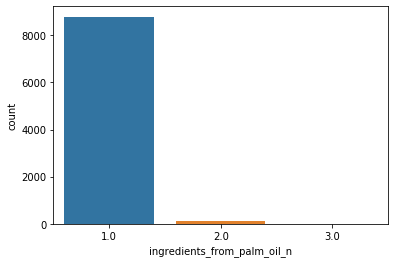

In [21]:
sns.countplot(df_palm['ingredients_from_palm_oil_n'].loc[df_palm['ingredients_from_palm_oil_n']!=0])

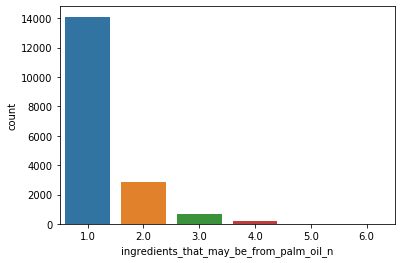

In [99]:
sns.countplot(df_palm['ingredients_that_may_be_from_palm_oil_n'].loc[df_palm['ingredients_that_may_be_from_palm_oil_n']!=0])

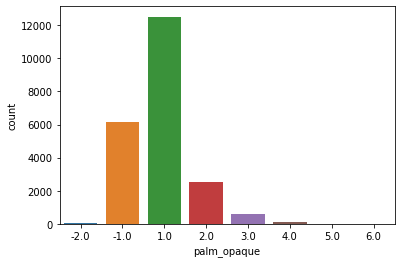

In [100]:
sns.countplot(df_palm['palm_opaque'].loc[df_palm['palm_opaque']!=0])

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,quantity,packaging,...,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
0,0000000000017,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1529059080,2018-06-15T10:38:00Z,1561463718,2019-06-25T11:55:18Z,Vitória crackers,,,...,375.0,1569.0,7.0,3.08,70.1,15.0,7.8,1.40,0.560,NaN
1,0000000000031,http://world-en.openfoodfacts.org/product/0000...,isagoofy,1539464774,2018-10-13T21:06:14Z,1539464817,2018-10-13T21:06:57Z,Cacao,130 g,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0000000000100,http://world-en.openfoodfacts.org/product/0000...,del51,1444572561,2015-10-11T14:09:21Z,1444659212,2015-10-12T14:13:32Z,moutarde au moût de raisin,100g,,...,NaN,936.0,8.2,2.20,29.0,22.0,5.1,4.60,1.840,18.0
4,0000000000123,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1535737982,2018-08-31T17:53:02Z,1535737986,2018-08-31T17:53:06Z,Sauce Sweety chili 0%,,,...,21.0,88.0,0.0,0.00,4.8,0.4,0.2,2.04,0.816,NaN
5,0000000000178,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1542456332,2018-11-17T12:05:32Z,1542456333,2018-11-17T12:05:33Z,Mini coco,,,...,60.0,251.0,3.0,1.00,10.0,3.0,2.0,1.15,0.460,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712319,9999992756068,http://world-en.openfoodfacts.org/product/9999...,kiliweb,1587209487,2020-04-18T11:31:27Z,1591133605,2020-06-02T21:33:25Z,Steak haché,500 g,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
712320,99999988,http://world-en.openfoodfacts.org/product/9999...,teolemon,1546519833,2019-01-03T12:50:33Z,1563296976,2019-07-16T17:09:36Z,Boules,,,...,372.0,1556.0,11.0,1.30,58.0,54.0,6.3,0.02,0.008,NaN
712321,9999999004360,http://world-en.openfoodfacts.org/product/9999...,kiliweb,1548086277,2019-01-21T15:57:57Z,1558357406,2019-05-20T13:03:26Z,Minis beignets,,,...,333.0,1393.0,20.2,6.00,30.9,10.4,7.4,1.10,0.440,15.0
712322,99999995,http://world-en.openfoodfacts.org/product/9999...,kiliweb,1538818432,2018-10-06T09:33:52Z,1552167501,2019-03-09T21:38:21Z,Steak haché pur boeuf,,,...,131.0,548.0,5.0,2.30,0.0,0.0,21.5,0.18,0.072,-2.0


Text(0, 0.5, 'Nombre de produits')

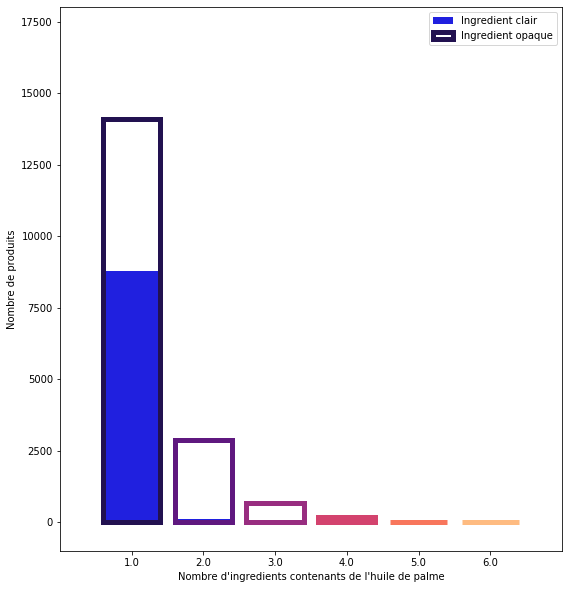

In [60]:
plt.figure(1,figsize=[9,10])
sns.countplot(df_palm['ingredients_from_palm_oil_n'].loc[df_palm['ingredients_from_palm_oil_n']!=0], color="blue", label="Ingredient clair")
ax=sns.countplot(df_palm['ingredients_that_may_be_from_palm_oil_n'].loc[df_palm['ingredients_that_may_be_from_palm_oil_n']!=0], color="red", facecolor=(0, 0, 0, 0),linewidth=5,edgecolor=sns.color_palette("magma", 6), label="Ingredient opaque")
plt.xlim(-1,6)
plt.ylim(-1000, 18000)
plt.legend()
plt.xlabel("Nombre d'ingredients contenants de l'huile de palme")
plt.ylabel("Nombre de produits")


                   

In [25]:
df_palmnutri=df_palm.loc[df_palm['nutriscore_grade'] !=""]

In [121]:
df_palmnutri.nutriscore_grade.unique()

array(['d', 'a', 'b', 'e', 'c'], dtype=object)

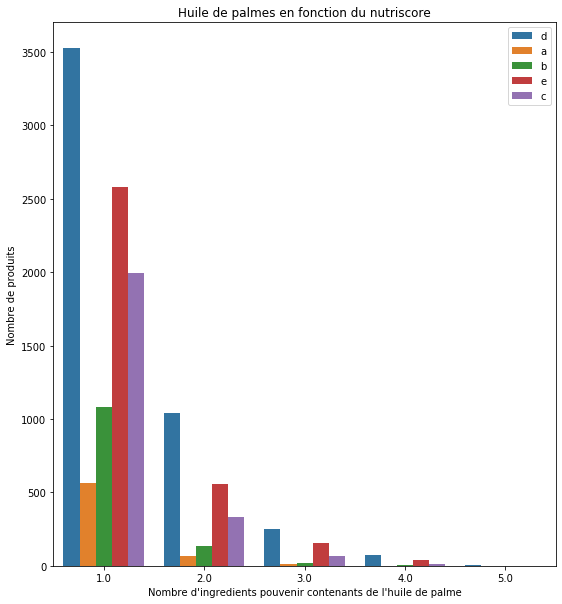

In [59]:
plt.figure(1,figsize=[9,10])
sns.countplot(df_palmnutri['ingredients_that_may_be_from_palm_oil_n'].loc[df_palm['ingredients_that_may_be_from_palm_oil_n']!=0],
              hue=df_palm['nutriscore_grade'].loc[df_palm['nutriscore_grade'] != ""])
plt.xlabel("Nombre d'ingredients pouvenir contenants de l'huile de palme")
plt.ylabel("Nombre de produits")
plt.title("Huile de palmes en fonction du nutriscore")
plt.legend(loc = 'upper right')

In [34]:
df_palmnutri['boolpalm']= df_palmnutri['ingredients_that_may_be_from_palm_oil_n'].apply(lambda x :
                                                                                        1 if x>0
                                                                                        else
                                                                                        0)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [36]:
df_palmnutri['boolpalm']

2         0
61        0
140       0
158       1
199       0
         ..
637727    0
637861    0
637907    0
637922    0
637924    0
Name: boolpalm, Length: 125446, dtype: int64

Text(0.5, 1.0, "Présence potentiel d'huile de palmes")

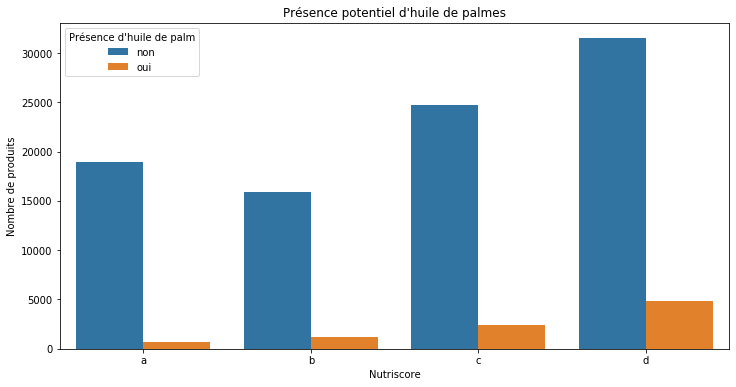

In [58]:
plt.figure(1,figsize=[12,6])
sns.countplot(df_palmnutri['nutriscore_grade'],
              hue=df_palmnutri['boolpalm'], order=["a","b","c","d"])

plt.xlabel("Nutriscore")
plt.ylabel("Nombre de produits")
plt.legend(["non", "oui"],title = "Présence d'huile de palm")
plt.title("Présence potentiel d'huile de palmes")

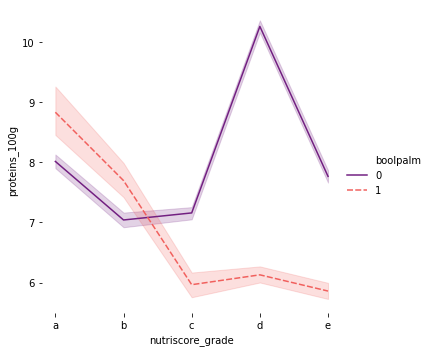

In [79]:

g = sns.relplot(
    
    data=df_palmnutri,
    x="nutriscore_grade", y="proteins_100g",
    style="boolpalm", hue= "boolpalm",
    kind="line",
    palette='magma', sizes=(10, 200) 
)
g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)
g.despine(left=True, bottom=True)
sns.set_style="darkgrid"
plt.show()

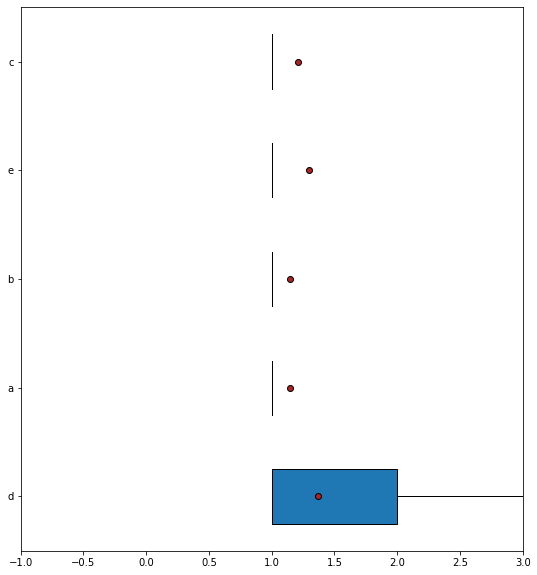

In [26]:
mod= df_palmnutri['nutriscore_grade'].unique()
group= []

for m in mod:
    group.append(df_palmnutri[df_palmnutri['nutriscore_grade']==m]['ingredients_that_may_be_from_palm_oil_n'].loc[df_palmnutri['ingredients_that_may_be_from_palm_oil_n']!=0])

medianprops = {'color':"black"}

meanprops = {'marker':'o', 'markeredgecolor':'black', 
             'markerfacecolor':'firebrick'}

    
plt.figure(1,figsize=[9,10])
plt.boxplot(group, labels=mod, showfliers=False, medianprops=medianprops, 

            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.xlim(-1,3)
plt

plt.show()

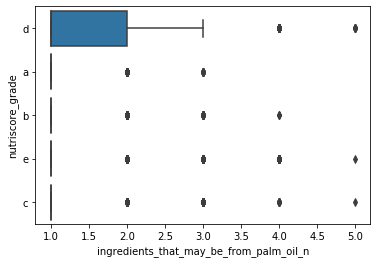

In [145]:
sns.boxplot(df_palmnutri['ingredients_that_may_be_from_palm_oil_n'].loc[df_palmnutri['ingredients_that_may_be_from_palm_oil_n']!=0],df_palmnutri['nutriscore_grade'])

In [143]:
group

[234       2.0
 376       1.0
 444       1.0
 468       1.0
 504       1.0
          ... 
 635541    1.0
 635693    1.0
 635764    2.0
 637243    1.0
 637244    1.0
 Name: ingredients_that_may_be_from_palm_oil_n, Length: 4895, dtype: float64,
 693       2.0
 725       1.0
 732       1.0
 740       2.0
 777       2.0
          ... 
 623798    2.0
 623834    1.0
 634520    1.0
 634522    1.0
 634536    1.0
 Name: ingredients_that_may_be_from_palm_oil_n, Length: 648, dtype: float64,
 158       2.0
 551       1.0
 779       1.0
 1382      1.0
 4760      1.0
          ... 
 634424    2.0
 636193    1.0
 636714    1.0
 636754    1.0
 636874    1.0
 Name: ingredients_that_may_be_from_palm_oil_n, Length: 1240, dtype: float64,
 329       1.0
 397       1.0
 988       1.0
 1054      4.0
 1066      1.0
          ... 
 636761    1.0
 636762    1.0
 636771    1.0
 637042    1.0
 637600    1.0
 Name: ingredients_that_may_be_from_palm_oil_n, Length: 3334, dtype: float64,
 566       1.0
 662       1.0

On remarque que les produit avec la plus grosse présence d'huile de palme ont un nutriscore de d,e et c.

In [27]:
def eta_squared(x,y):
    moy= y.mean() #Moyenne de la valeur quantitative
    classes = []  #Liste de réception
    for classe in x.unique(): #Début de la boucle qui va se baser sur les x unique (Valeurs qualitative)
        yi_classe = y[x==classe] #Variable qui stock le prix avec comme condition l'appartenance à la classe de l'itération
        classes.append({'ni': len(yi_classe), #On stocks le nombre de valeur de yi_classes
                       'moyenne_classe': yi_classe.mean()})# que l'on corréle avec sa moyenne de classe 
    SCT = sum([(yj-moy)**2 for yj in y])# On calcul notre variance Total.
    SCE = sum([c['ni']*(c['moyenne_classe']-moy)**2 for c in classes])# On calcul notre variance inter
    return SCE/SCT # on retourne le rapport pour avoir le coef


In [28]:
eta_squared(df_palmnutri.nutriscore_grade, df_palmnutri['ingredients_that_may_be_from_palm_oil_n'].loc[df_palmnutri['ingredients_that_may_be_from_palm_oil_n']!=0])

0.01853970455004133

### Aide pour daline

In [ ]:
df_cat=df_off.groupby("categories").count()# On créer un df avec nos counts
df_cat=df_cat.loc[df_cat["code"] > 40] # On filtre 
df_cat.sort_values("code")#Check 1
df_list=df_cat.index #On récupére nos index dans une liste
df_cat40= df_off.loc[df_off['categories'].isin(df_list)] #On s'en sert comme condition de IN 
df_cat40 #DF de résultat avec tout les produits compris dans les catégorie mentionné plus de 40 fois

In [127]:
for n in df_palmnutri.nutriscore_grade.unique():
    print(n,"Median =",df_palmnutri["fat_100g"].loc[df_palmnutri.nutriscore_grade == n].median())

d Median = 15.0
a Median = 1.6
b Median = 3.0
e Median = 26.0
c Median = 5.6


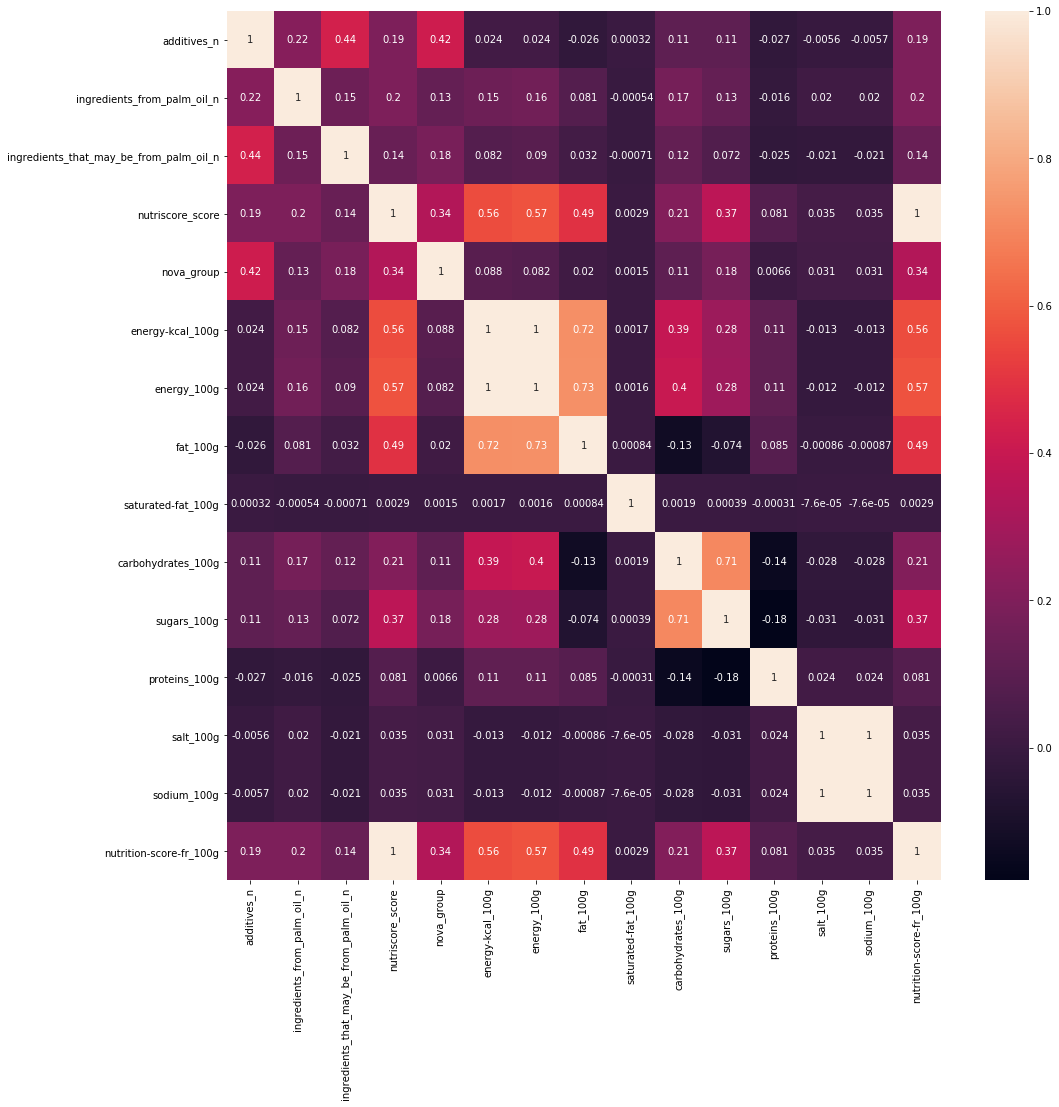

In [62]:
plt.figure(1,figsize=[16,16])
sns.heatmap(dffr.corr(),annot=True)


In [ ]:
sns.relplot(
    data=d, kind="line",
    x="time", y="firing_rate", col="align",
    hue="choice", size="coherence", style="choice",
    facet_kws=dict(sharex=False),
)